In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [96]:
X = 6*np.random.random(200)-3    # make random points on X-axis from -3 to 3
y = 0.9*X**2 + 0.2*X + 3 + np.random.randn(200)    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

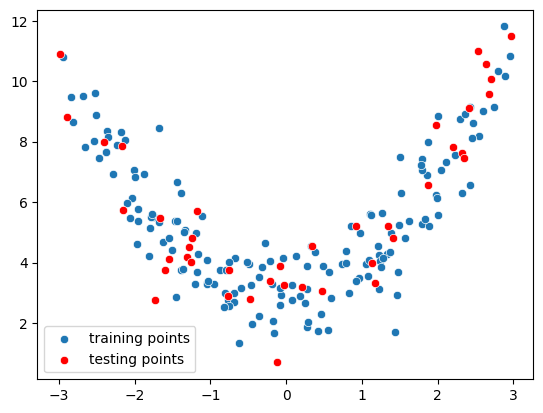

In [97]:
sns.scatterplot(x=X_train, y=y_train, label='training points')
sns.scatterplot(x=X_test, y=y_test, color='red', label='testing points')

In [149]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train)
y_pred = lr.predict(X_test.reshape(-1,1))

r2_score(y_test, y_pred)

-0.012497453976906714

In [150]:
lr.intercept_, lr.coef_

(np.float64(5.236878403202806), array([0.081896]))

<Axes: >

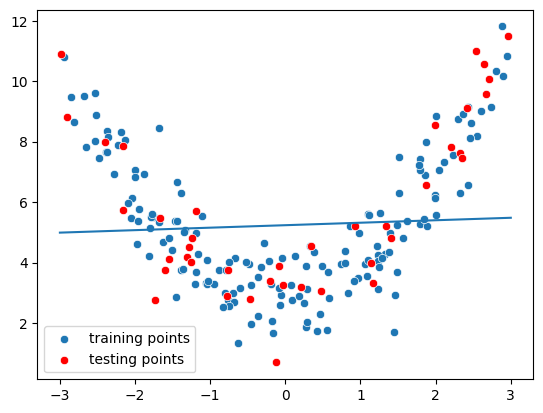

In [151]:
X_plot = np.linspace(-3,3,30)
y_plot = lr.predict(X_plot.reshape(-1,1))

sns.scatterplot(x=X_train, y=y_train, label='training points')
sns.scatterplot(x=X_test, y=y_test, color='red', label='testing points')
sns.lineplot(x=X_plot, y=y_plot)

In [171]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_trf = poly.fit_transform(X_train.reshape(-1,1))
X_test_trf = poly.transform(X_test.reshape(-1,1))

print(X_train[0])
print(X_train_trf[0])

-2.65768203420114
[-2.65768203  7.06327379]


In [172]:
print(f'powers : {poly.powers_}')
print(f'in features : {poly.n_features_in_}')
print(f'out features : {poly.n_output_features_}')

powers : [[1]
 [2]]
in features : 1
out features : 2


In [173]:
lr.fit(X_train_trf, y_train)
y_pred = lr.predict(X_test_trf)

r2_score(y_test, y_pred)

0.8655287174814786

In [174]:
lr.intercept_, lr.coef_

(np.float64(3.0044780467895587), array([0.08360796, 0.87461409]))

<Axes: >

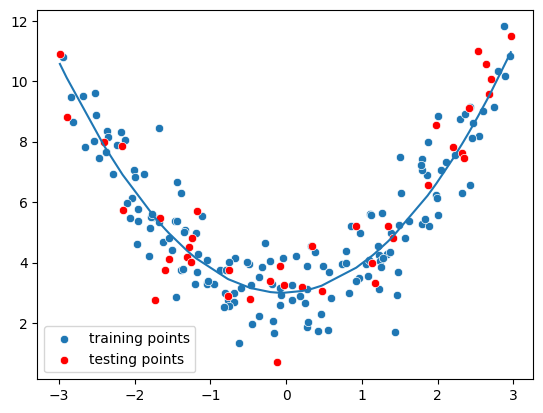

In [186]:
sns.scatterplot(x=X_train, y=y_train, label='training points')
sns.scatterplot(x=X_test, y=y_test, color='red', label='testing points')
sns.lineplot(x=X_test, y=y_pred)

<Axes: >

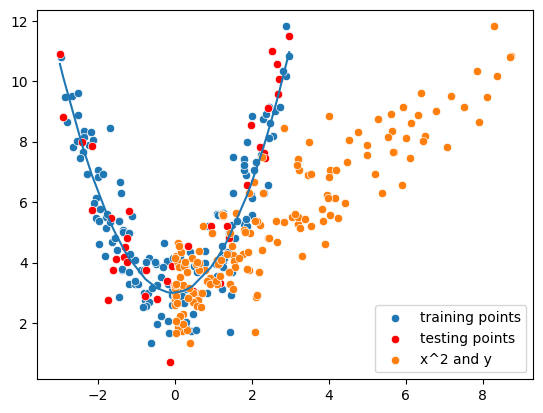

In [191]:
sns.scatterplot(x=X_train, y=y_train, label='training points')
sns.scatterplot(x=X_test, y=y_test, color='red', label='testing points')
sns.scatterplot(x=X_train_trf[:,1], y=y_train, label='x^2 and y')
sns.lineplot(x=X_test, y=y_pred)

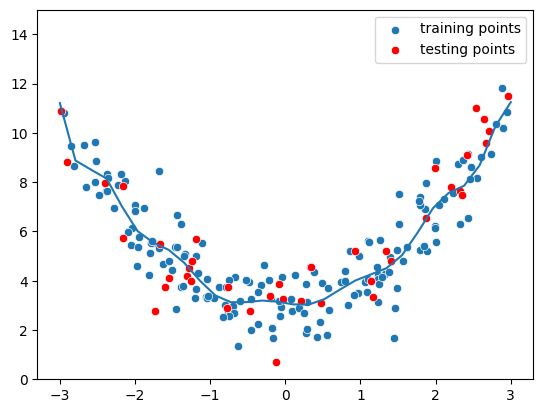

In [234]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def func(degree):
    X_plot = np.linspace(-3,3,30)

    pipe = Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=degree)),
        # ('scaler', MinMaxScaler()),
        ('reg', LinearRegression())
    ])
    
    pipe.fit(X_train.reshape(-1,1), y_train)
    y_plot = pipe.predict(X_plot.reshape(-1,1))

    sns.scatterplot(x=X_train, y=y_train, label='training points')
    sns.scatterplot(x=X_test, y=y_test, color='red', label='testing points')
    # sns.scatterplot(x=X_train_trf[:,1], y=y_train, label='x^2 and y')
    sns.lineplot(x=X_plot, y=y_plot)
    plt.ylim(0,15)


func(15)

# 3D polynomial regression (Multiple Polynomial LR)

In [288]:
x = 10 * np.random.random(100) - 5
y = 10 * np.random.random(100) - 5
z = x**2 + 0.3*(y**2) + 4*x*y + 5*x + 2*y + 3 + 10*np.random.randn(100)    # to add some noise we added random

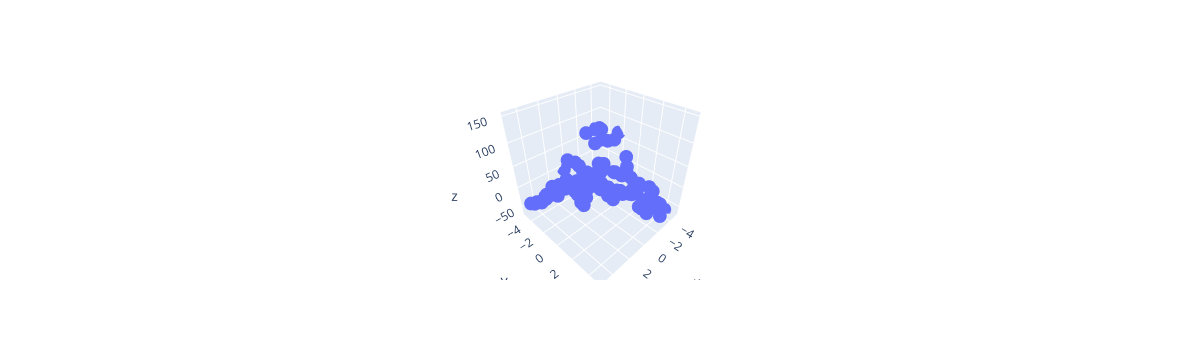

In [289]:
import plotly.express as px
px.scatter_3d(x=x, y=y, z=z)